In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [49]:
# Displaying the first five rows of aisles dataset
print("Aisles Data:")
aisles.head()

Aisles Data:


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [51]:
# Displaying the first five rows of departments dataset
print("Departments Data:")
departments.head()

Departments Data:


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
# Displaying the first five rows of Order Products Prior dataset
print("Order Products Prior Data:")
order_products_prior.head()

Order Products Prior Data:


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
# Displaying the first five rows of Order Products Prior dataset
print("Order Products Train Data:")
order_products_train.head()

Order Products Train Data:


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [15]:
# Displaying the first five rows of Orders dataset
print("Orders Data:")
orders.head()

Orders Data:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [17]:
# Displaying the first five rows of Products dataset
print("Products Data:")
products.head()

Products Data:


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# (1) What is the shape of input data tables? Are there any null values? Summary stats for each table.

In [19]:
# Function to display basic info for each dataframe without ID columns
def explore_data(df, name, id_cols):
    print(f"------------------------ {name} ----------------------------")
    print("-------------------------------------------------------------------")
    print(f"Shape: {df.shape}")
    print("Null values:\n", df.isnull().sum(),"\n")
    print("Summary statistics:\n", df.drop(columns=id_cols).describe(include='all'))
    print("\n")
    print("-------------------------------------------------------------------")

# Explore each dataset separately

# Aisles
explore_data(aisles, 'aisles', ['aisle_id'])

# Departments
explore_data(departments, 'departments', ['department_id'])

# Order Products Prior
explore_data(order_products_prior, 'order_products_prior', ['order_id', 'product_id'])

# Order Products Train
explore_data(order_products_train, 'order_products_train', ['order_id', 'product_id'])

# Orders
explore_data(orders, 'orders', ['order_id', 'user_id'])

# Products
explore_data(products, 'products', ['product_id', 'aisle_id', 'department_id'])

------------------------ aisles ----------------------------
-------------------------------------------------------------------
Shape: (134, 2)
Null values:
 aisle_id    0
aisle       0
dtype: int64 

Summary statistics:
                         aisle
count                     134
unique                    134
top     prepared soups salads
freq                        1


-------------------------------------------------------------------
------------------------ departments ----------------------------
-------------------------------------------------------------------
Shape: (21, 2)
Null values:
 department_id    0
department       0
dtype: int64 

Summary statistics:
        department
count          21
unique         21
top        frozen
freq            1


-------------------------------------------------------------------
------------------------ order_products_prior ----------------------------
-------------------------------------------------------------------
Shape: (32434489,

# (2) How is the frequency of orders varying across weekdays, hour of day?
Ans : Most of the orders were placed day 0 (Sunday) & day 1 (Monday) in between 9 AM to 5 PM

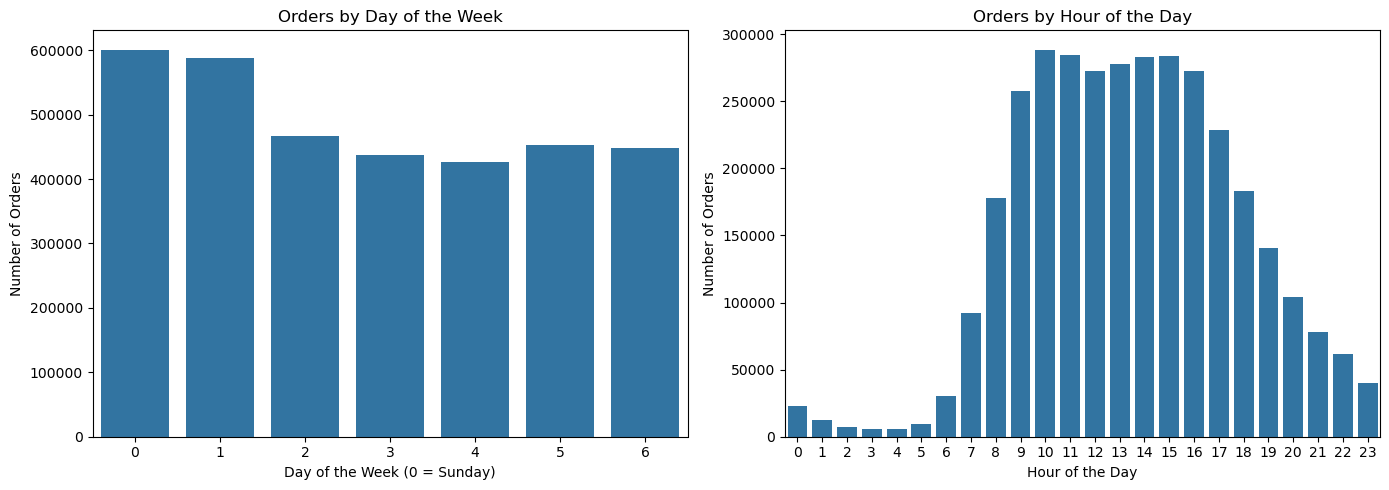

In [53]:
# Frequency of orders by day of the week
# Count the number of orders for each day of the week and sort by day (0 = Sunday, 1 = Monday, ..., 6 = Saturday)
orders_by_dow = orders['order_dow'].value_counts().sort_index()

# Frequency of orders by hour of day
# Count the number of orders for each hour of the day and sort by hour (0 = midnight, 1 = 1 AM, ..., 23 = 11 PM)
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Plotting
# Create a figure with a specific size (14 inches wide by 5 inches high)
plt.figure(figsize=(14, 5))

# Plot for days of the week
# Add a subplot (1 row, 2 columns, position 1)
plt.subplot(1, 2, 1)
# Create a bar plot for the number of orders by day of the week
sns.barplot(x=orders_by_dow.index, y=orders_by_dow.values)
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week (0 = Sunday)')
plt.ylabel('Number of Orders')

# Plot for hours of the day
plt.subplot(1, 2, 2)
# Create a bar plot for the number of orders by hour of the day
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values)
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

# (3) What is the avg gap between two consecutive orders for a particular customer? Are there any patterns?
Ans : Average Gap between two two consecutive orders for a particular customer is 15.44 days (Mean) , 
pattern : It looks like normal distribution

Average gap between orders for each customer: user_id
1         19.000000
2         16.285714
3         12.000000
4         17.000000
5         11.500000
            ...    
206205    16.666667
206206     3.716418
206207    14.312500
206208     7.367347
206209    18.461538
Name: days_since_prior_order, Length: 206209, dtype: float64
Summary statistics for the average gap between orders:
count    206209.000000
mean         15.448686
std           6.915575
min           0.000000
25%           9.814815
50%          15.000000
75%          20.625000
max          30.000000
Name: days_since_prior_order, dtype: float64


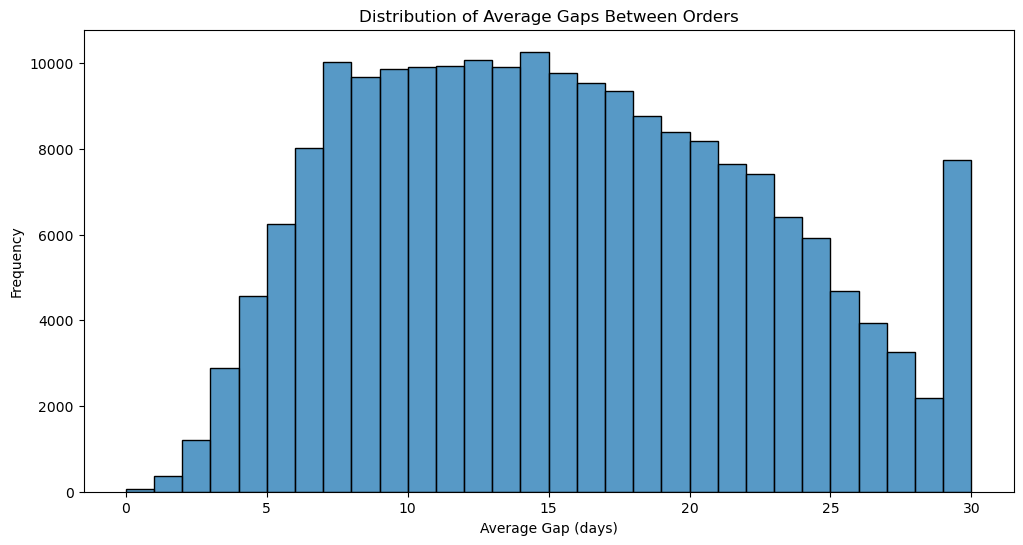

In [55]:
# Calculate the average gap between orders for each customer
# Group the orders by 'user_id' and then calculate the mean of 'days_since_prior_order' for each group
average_gap = orders.groupby('user_id')['days_since_prior_order'].mean()
# Print the average gap between orders for each customer
print("Average gap between orders for each customer:", average_gap)

# Print a descriptive summary of the average gaps, including count, mean, std, min, 25%, 50%, 75%, and max
print("Summary statistics for the average gap between orders:")
print(average_gap.describe())

# Plot the distribution of average gaps
plt.figure(figsize=(12, 6))
# Create a histogram plot for the average gaps using 30 bins
sns.histplot(average_gap, bins=30)
plt.title('Distribution of Average Gaps Between Orders')
plt.xlabel('Average Gap (days)')
plt.ylabel('Frequency')
plt.show()

# (4) What is the avg basket size? Which products are majorly reordered?
Ans : The Avg basket size : 10.11 , Majorly reordered product : Banana

In [57]:
# Concatenate the order_products_prior and order_products_train DataFrames along the rows to create a single DataFrame
order_products = pd.concat([order_products_prior, order_products_train])

# Group the combined order_products DataFrame by 'order_id' and calculate the size of each group (i.e., the number of products in each order)
# Then, calculate the mean size of these groups to get the average basket size
avg_basket_size = order_products.groupby('order_id').size().mean()
# Print the average basket size, formatted to two decimal places
print(f"Average basket size: {avg_basket_size:.2f}")

Average basket size: 10.11


In [65]:
# Identify the products that are most frequently reordered
# Filter the order_products DataFrame to include only rows where 'reordered' is 1
# Count the occurrences of each 'product_id' in the filtered DataFrame and select the top 10 most frequently reordered products
reordered_products = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(10)

# Convert reordered_products to a DataFrame and merge to get product names
# Reset the index of the reordered_products Series to convert it to a DataFrame
reordered_products_df = reordered_products.reset_index()
# Rename the columns of the DataFrame to 'product_id' and 'reorder_count'
reordered_products_df.columns = ['product_id', 'reorder_count']
print(reordered_products_df)
# Merge the reordered_products_df DataFrame with the products DataFrame on 'product_id' to get the product names
reordered_products_df = reordered_products_df.merge(products, on='product_id', how='left')

print("\nTop 10 majorly reordered products:")
# Print the DataFrame with the columns 'product_id', 'product_name', and 'reorder_count'
print(reordered_products_df[['product_id', 'product_name', 'reorder_count']])

   product_id  reorder_count
0       24852         415166
1       13176         329275
2       21137         214448
3       21903         194939
4       47209         176173
5       47766         140270
6       27845         118684
7       47626         112178
8       27966         109688
9       16797         104588

Top 10 majorly reordered products:
   product_id            product_name  reorder_count
0       24852                  Banana         415166
1       13176  Bag of Organic Bananas         329275
2       21137    Organic Strawberries         214448
3       21903    Organic Baby Spinach         194939
4       47209    Organic Hass Avocado         176173
5       47766         Organic Avocado         140270
6       27845      Organic Whole Milk         118684
7       47626             Large Lemon         112178
8       27966     Organic Raspberries         109688
9       16797            Strawberries         104588


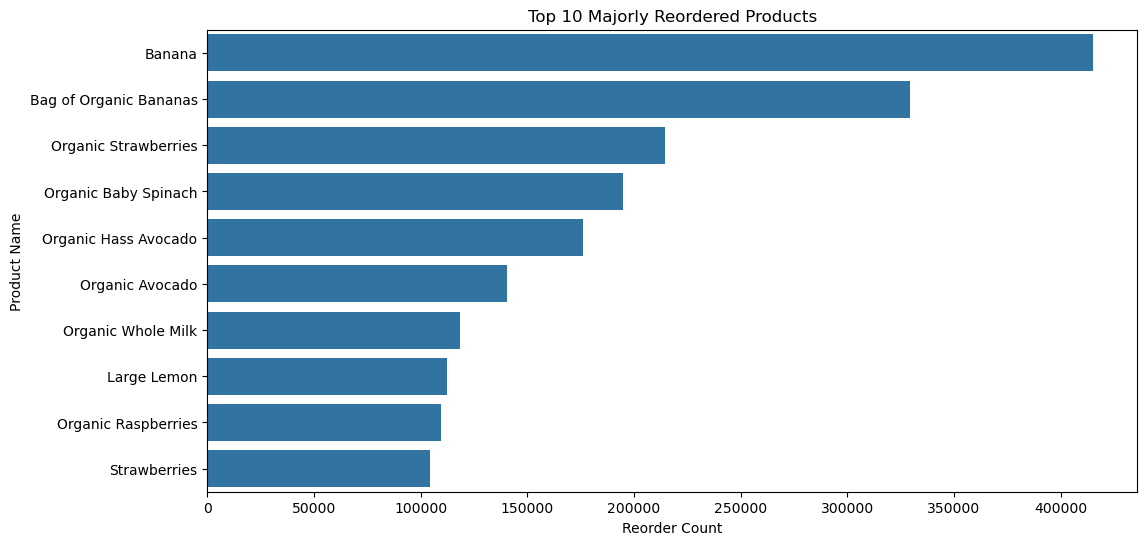

In [17]:
# Plot the top 10 reordered products
plt.figure(figsize=(12, 6))

sns.barplot(x='reorder_count', y='product_name', data=reordered_products_df)

plt.title('Top 10 Majorly Reordered Products')
plt.xlabel('Reorder Count') 
plt.ylabel('Product Name')  
plt.show() 

# (5) Identify top product categories/departments, categories with higher reorder rate.
Ans : Top department by total number of orders : produce , Top department by reorder rate : dairy eggs

In [29]:
# Concatenate 'order_products_prior' and 'order_products_train' DataFrames into 'order_products'
order_products = pd.concat([order_products_prior, order_products_train])

# Merge 'order_products' with 'products' DataFrame on 'product_id',
# then merge the resulting DataFrame with 'departments' DataFrame on 'department_id'
order_products = order_products.merge(products, on='product_id').merge(departments, on='department_id')

# Group by 'department' column in 'order_products' DataFrame,
# calculate aggregate statistics for 'reordered' column: total_orders (size) and reorder_rate (mean),
# then reset the index to create 'department_stats' DataFrame
department_stats = order_products.groupby('department')['reordered'].agg(total_orders='size', reorder_rate='mean').reset_index()

# Sort 'department_stats' DataFrame by 'total_orders' column in descending order,
# assign the result to 'top_departments' DataFrame
top_departments = department_stats.sort_values(by='total_orders', ascending=False)

print('Top department in terms of total number of orders: \n', top_departments, '\n')

Top department in terms of total number of orders: 
          department  total_orders  reorder_rate
19          produce       9888378      0.650521
7        dairy eggs       5631067      0.670161
20           snacks       3006412      0.574464
3         beverages       2804175      0.653651
10           frozen       2336858      0.542634
16           pantry       1956819      0.347400
2            bakery       1225181      0.628381
6      canned goods       1114857      0.458639
8              deli       1095540      0.608130
9   dry goods pasta        905340      0.462220
11        household        774652      0.403339
13     meat seafood        739238      0.568625
4         breakfast        739069      0.561351
17    personal care        468693      0.321863
1            babies        438743      0.577680
12    international        281155      0.369682
0           alcohol        159294      0.571221
18             pets        102221      0.602557
14          missing         77396  

In [33]:
# Sort 'department_stats' DataFrame by 'reorder_rate' column in descending order,
# assign the result to 'top_reordered_rate' DataFrame
top_reordered_rate = department_stats.sort_values(by='reorder_rate', ascending=False)

print('Top department in terms of reorder rate: \n', top_reordered_rate)

Top department in terms of reorder rate: 
          department  total_orders  reorder_rate
7        dairy eggs       5631067      0.670161
3         beverages       2804175      0.653651
19          produce       9888378      0.650521
2            bakery       1225181      0.628381
8              deli       1095540      0.608130
18             pets        102221      0.602557
1            babies        438743      0.577680
5              bulk         35932      0.577090
20           snacks       3006412      0.574464
0           alcohol        159294      0.571221
13     meat seafood        739238      0.568625
4         breakfast        739069      0.561351
10           frozen       2336858      0.542634
9   dry goods pasta        905340      0.462220
6      canned goods       1114857      0.458639
15            other         38086      0.407052
11        household        774652      0.403339
14          missing         77396      0.394323
12    international        281155      0.3696

# (6) Which products are added to the cart first? Explore relationship between the order in which products are added to the cart and the reorder frequency.
Ans : Banana added to cart first 

In [71]:
# Concatenate 'order_products_prior' and 'order_products_train' DataFrames into 'order_products'
order_products = pd.concat([order_products_prior, order_products_train])

# Filter rows in 'order_products' where 'add_to_cart_order' is 1,
# then count occurrences of each 'product_id', and select the top 10 most frequent ones
first_products = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(10)
print(first_products)
# Reset the index of 'first_products' DataFrame
first_products = first_products.reset_index()
print(first_products)
# Rename columns of 'first_products' DataFrame to 'product_id' and 'count'
#first_products.columns = ['product_id', 'count']

# Merge 'first_products' DataFrame with 'products' DataFrame on 'product_id',
# keeping all rows from 'first_products' even if there is no matching 'product_id' in 'products'
first_products = pd.merge(first_products, products, on='product_id', how='left')

# Print columns 'product_id', 'product_name', and 'count' from 'first_products' DataFrame
print(first_products[['product_id', 'product_name', 'count']])

product_id
24852    115521
13176     82877
27845     32071
21137     28875
47209     24913
21903     24412
47766     23393
19660     17552
16797     17073
27966     14950
Name: count, dtype: int64
   product_id   count
0       24852  115521
1       13176   82877
2       27845   32071
3       21137   28875
4       47209   24913
5       21903   24412
6       47766   23393
7       19660   17552
8       16797   17073
9       27966   14950
   product_id            product_name   count
0       24852                  Banana  115521
1       13176  Bag of Organic Bananas   82877
2       27845      Organic Whole Milk   32071
3       21137    Organic Strawberries   28875
4       47209    Organic Hass Avocado   24913
5       21903    Organic Baby Spinach   24412
6       47766         Organic Avocado   23393
7       19660            Spring Water   17552
8       16797            Strawberries   17073
9       27966     Organic Raspberries   14950


     add_to_cart_order  reordered
0                    1   0.679302
1                    2   0.677135
2                    3   0.658426
3                    4   0.637350
4                    5   0.617598
..                 ...        ...
140                141   0.000000
141                142   0.000000
142                143   0.000000
143                144   0.000000
144                145   0.000000

[145 rows x 2 columns]


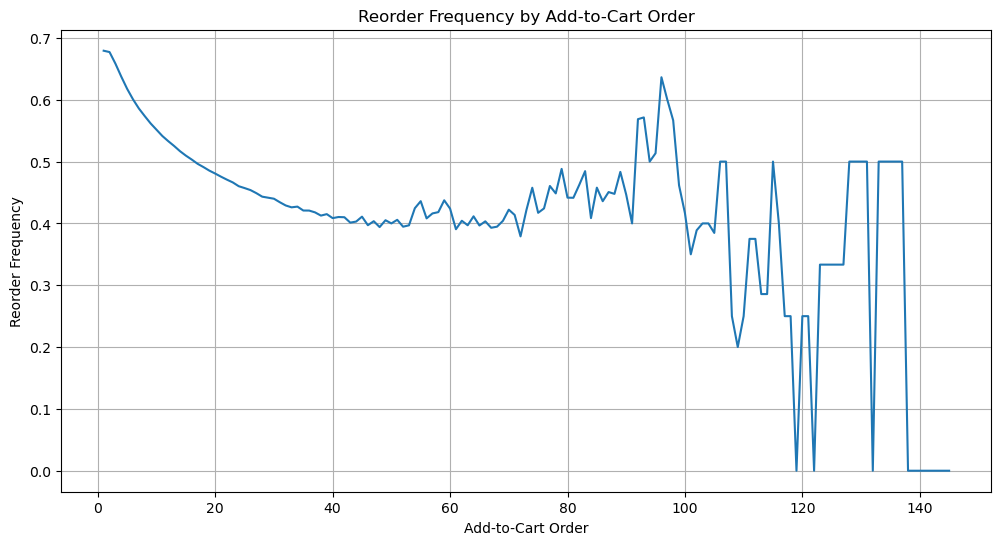

In [73]:
# Combine 'order_products_prior' and 'order_products_train' DataFrames into 'order_products'
order_products = pd.concat([order_products_prior, order_products_train])

# Merge 'order_products' with 'products' DataFrame to get 'product_name' based on 'product_id',
# keeping all rows from 'order_products' even if there is no matching 'product_id' in 'products'
order_products = order_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Group by 'add_to_cart_order' in 'order_products', calculate mean of 'reordered' column,
# and reset the index to create 'reorder_freq' DataFrame
reorder_freq = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
print(reorder_freq)
plt.figure(figsize=(12, 6))

# Create a line plot 
sns.lineplot(x='add_to_cart_order', y='reordered', data=reorder_freq)
plt.title('Reorder Frequency by Add-to-Cart Order')
plt.xlabel('Add-to-Cart Order')
plt.ylabel('Reorder Frequency')
plt.grid(True)
plt.show()

# 7. How is the variation in the basket size of customers across the history of prior orders?

    user_id  order_number  basket_size
0         1             1          5.0
1         1             2          6.0
2         1             3          5.0
3         1             4          5.0
4         1             5          8.0
5         1             6          4.0
6         1             7          5.0
7         1             8          6.0
8         1             9          6.0
9         1            10          9.0
10        2             1         13.0
11        2             2          6.0
12        2             3          5.0
13        2             4         13.0
14        2             5         13.0
15        2             6         21.0
16        2             7         14.0
17        2             8         16.0
18        2             9         26.0
19        2            10          9.0


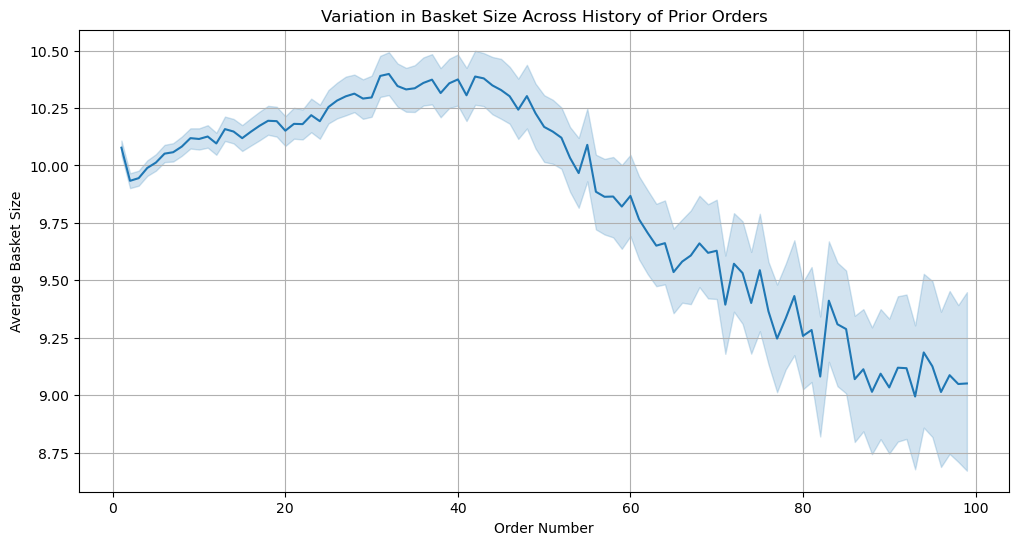

In [90]:
# Merge 'orders' DataFrame with 'order_products_prior' DataFrame based on 'order_id',
# keeping only rows where 'order_id' matches in both DataFrames ('inner' merge)
merged_data = pd.merge(orders, order_products_prior, on='order_id', how='inner')

# Group by 'order_id' in 'merged_data' DataFrame, count the number of 'product_id' per order,
# and reset the index to create 'basket_size' DataFrame
basket_size = merged_data.groupby('order_id')['product_id'].count().reset_index()

# Rename columns of 'basket_size' DataFrame to 'order_id' and 'basket_size'
basket_size.columns = ['order_id', 'basket_size']

# Merge 'basket_size' DataFrame with 'orders' DataFrame on 'order_id',
# keeping all rows from 'basket_size' even if there is no matching 'order_id' in 'orders'
basket_size = pd.merge(basket_size, orders[['order_id', 'user_id', 'order_number']], on='order_id', how='left')

# Group by 'user_id' and 'order_number' in 'basket_size' DataFrame,
# calculate mean of 'basket_size' column, and reset the index to create 'basket_size_variation' DataFrame
basket_size_variation = basket_size.groupby(['user_id', 'order_number'])['basket_size'].mean().reset_index()
print(basket_size_variation.head(20))

plt.figure(figsize=(12, 6))

# Create a line plot
sns.lineplot(x='order_number', y='basket_size', data=basket_size_variation)
plt.title('Variation in Basket Size Across History of Prior Orders')
plt.xlabel('Order Number')
plt.ylabel('Average Basket Size')
plt.grid(True)
plt.show()

# (8) Do customers with higher no. of orders have higher proportion of reordered products?
Ans : Not exactly , since correlation coefficient is 0.38 only

In [38]:
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')

# Filter 'orders' DataFrame to include only prior orders
prior_orders = orders[orders['eval_set'] == 'prior']

# Calculate total number of orders ('order_id' unique count) per customer ('user_id')
total_orders_per_customer = prior_orders.groupby('user_id')['order_id'].nunique().reset_index()
total_orders_per_customer.columns = ['user_id', 'total_orders']

# Merge 'order_products_prior' with 'prior_orders' to include 'user_id'
order_products_prior = order_products_prior.merge(prior_orders[['order_id', 'user_id']], on='order_id', how='left')

# Calculate total number of products ('product_id' count) per customer ('user_id')
total_products_per_customer = order_products_prior.groupby('user_id')['product_id'].count().reset_index()
total_products_per_customer.columns = ['user_id', 'total_products']

# Calculate number of reordered products ('product_id' count where 'reordered' == 1) per customer ('user_id')
reordered_products_per_customer = order_products_prior[order_products_prior['reordered'] == 1].groupby('user_id')['product_id'].count().reset_index()
reordered_products_per_customer.columns = ['user_id', 'reordered_products']

# Merge 'total_products_per_customer' with 'reordered_products_per_customer' and 'total_orders_per_customer' on 'user_id'
customer_reorder_data = total_products_per_customer.merge(reordered_products_per_customer, on='user_id', how='left')
customer_reorder_data = customer_reorder_data.merge(total_orders_per_customer, on='user_id', how='left')

# Calculate proportion of reordered products for each customer
customer_reorder_data['reorder_proportion'] = customer_reorder_data['reordered_products'] / customer_reorder_data['total_products']

# Sort 'customer_reorder_data' by 'reorder_proportion' in descending order and select top 10 customers
customer_reorder_data = customer_reorder_data.sort_values(by='reorder_proportion', ascending=False).head(10)

# Output the resulting DataFrame showing top 10 customers with highest reorder proportions
customer_reorder_data

,user_id,total_products,reordered_products,total_orders,reorder_proportion
99752,99753,191,189.0,99,0.989529
82413,82414,428,420.0,92,0.981308
107527,107528,104,102.0,53,0.980769
17996,17997,435,426.0,99,0.979310
5587,5588,2223,2176.0,91,0.978857
170173,170174,47,46.0,47,0.978723
3268,3269,275,269.0,81,0.978182
12024,12025,45,44.0,45,0.977778
91159,91160,212,207.0,85,0.976415
184516,184517,210,205.0,70,0.976190


In [41]:
# Calculate the correlation matrix between 'total_orders' and 'reorder_proportion' columns
correlation = customer_reorder_data[['total_orders', 'reorder_proportion']].corr()

# Print the correlation matrix
print(f'Correlation between total orders and reorder proportion: \n {correlation}')

Correlation between total orders and reorder proportion: 
                     total_orders  reorder_proportion
total_orders            1.000000            0.382288
reorder_proportion      0.382288            1.000000
